In [ ]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving wine.csv to wine (2).csv


In [ ]:
df = pd.read_csv("wine.csv")
df.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [ ]:
df.shape

(178, 14)

# EDA

In [ ]:
df.isna().sum()

Type               0
Alcohol            0
Malic              0
Ash                0
Alcalinity         0
Magnesium          0
Phenols            0
Flavanoids         0
Nonflavanoids      0
Proanthocyanins    0
Color              0
Hue                0
Dilution           0
Proline            0
dtype: int64

In [ ]:
df.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


## Creating Histograms

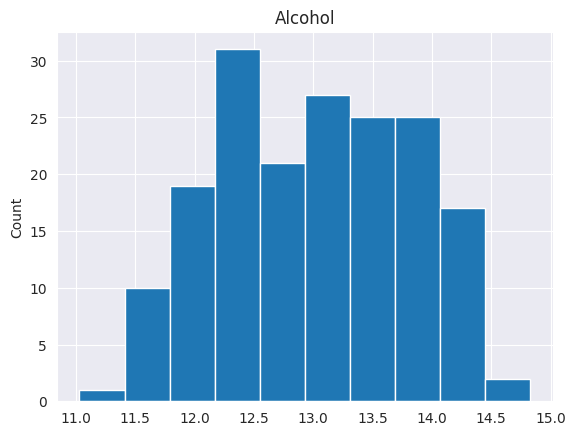

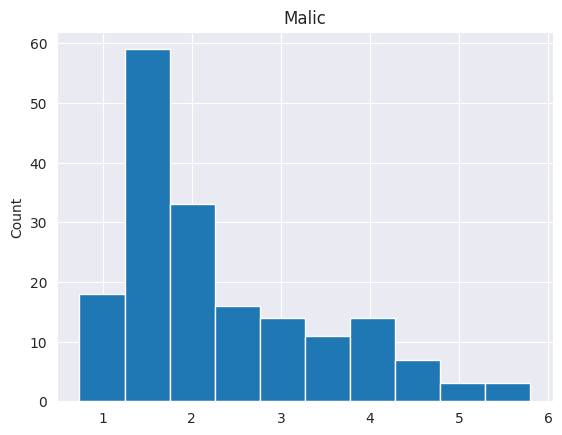

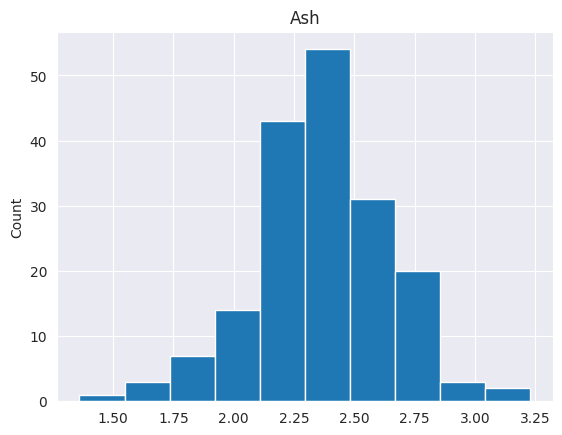

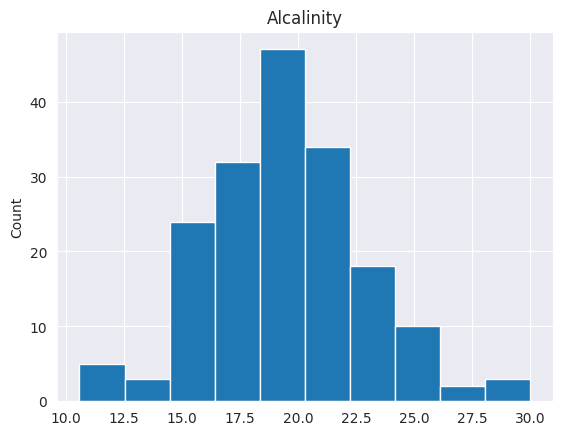

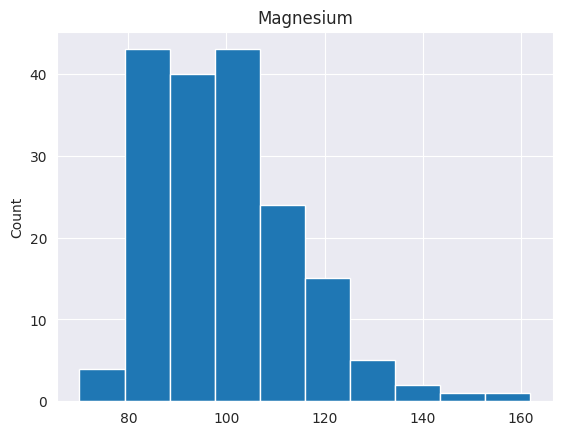

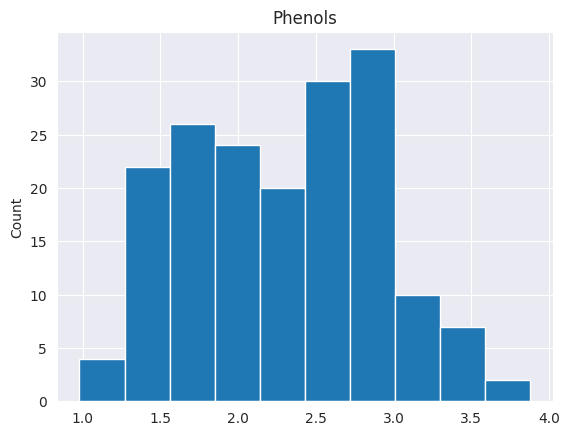

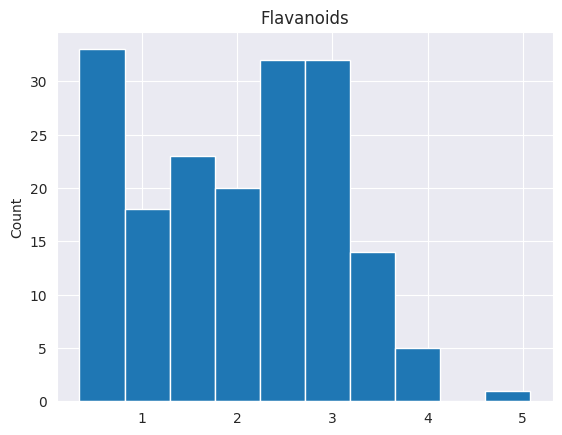

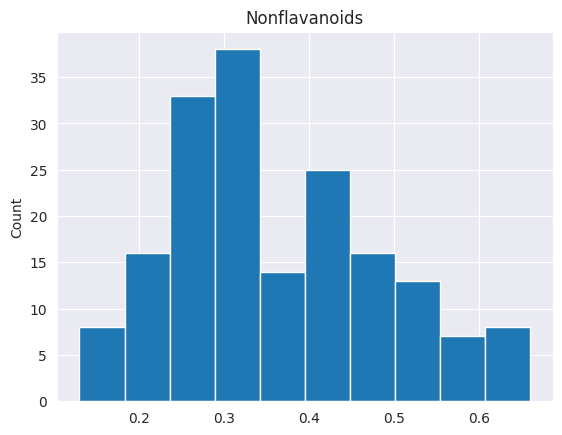

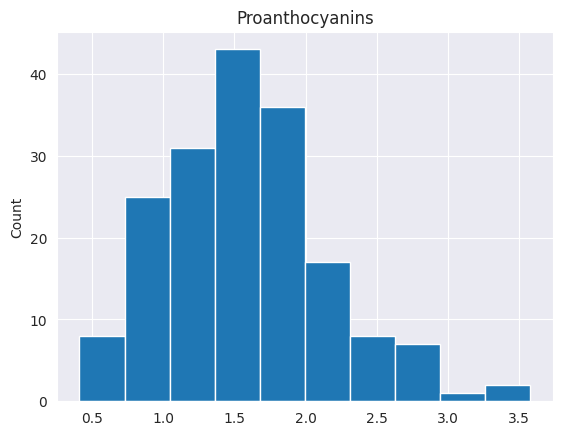

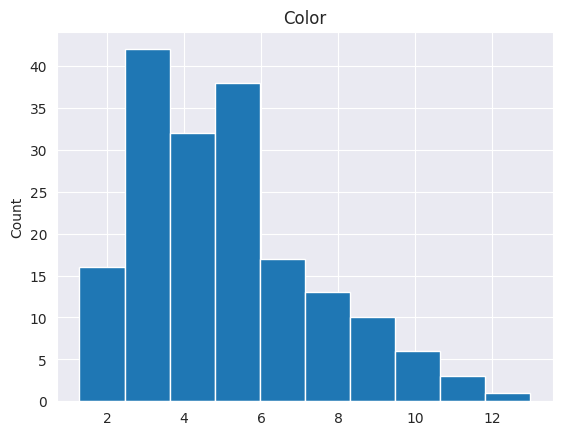

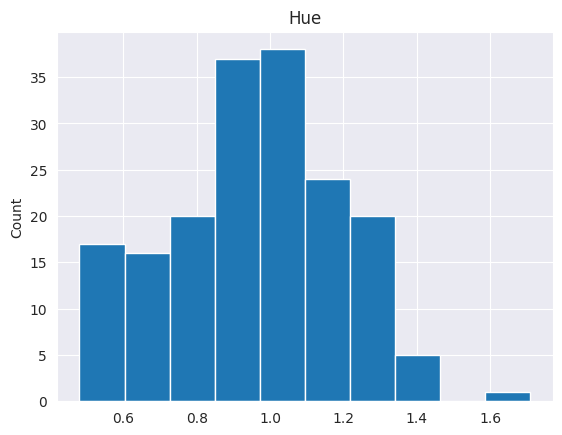

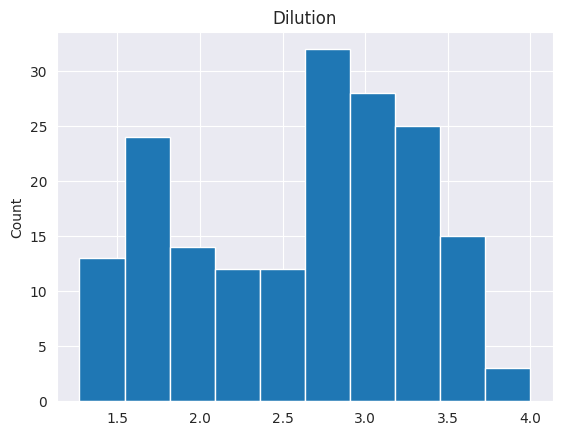

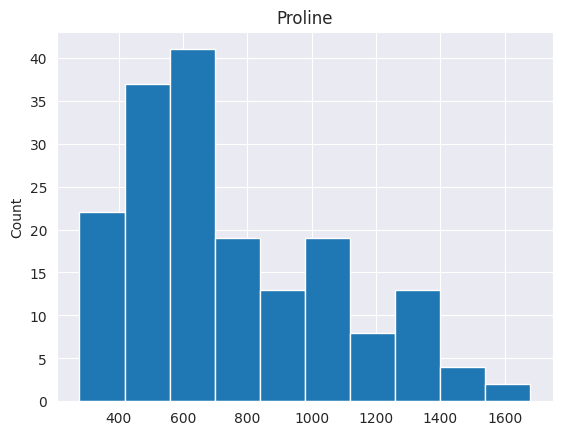

In [ ]:
for feature in df.iloc[:,1:]:
    df[feature].hist(bins=10)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

Alcohol


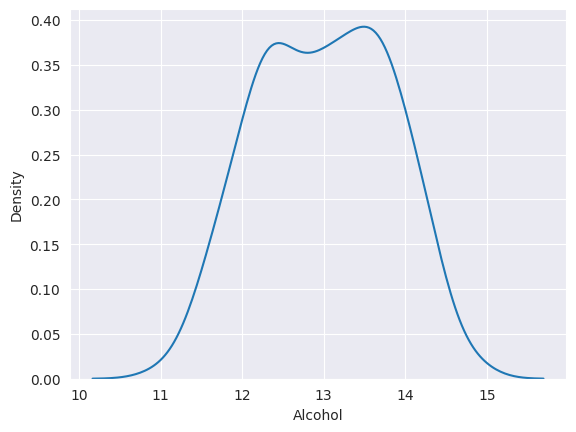

Malic


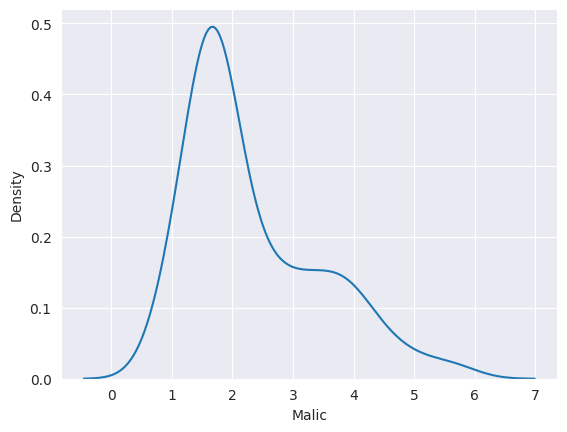

Ash


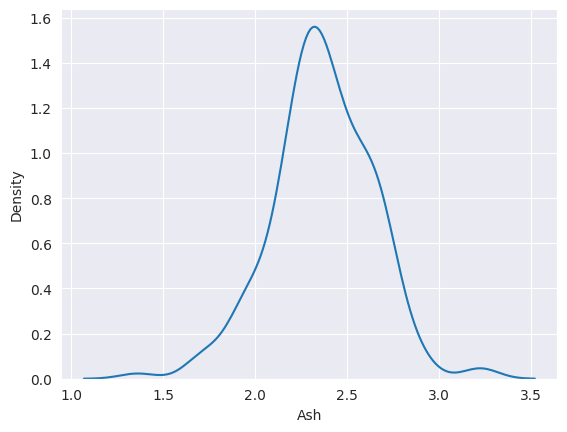

Alcalinity


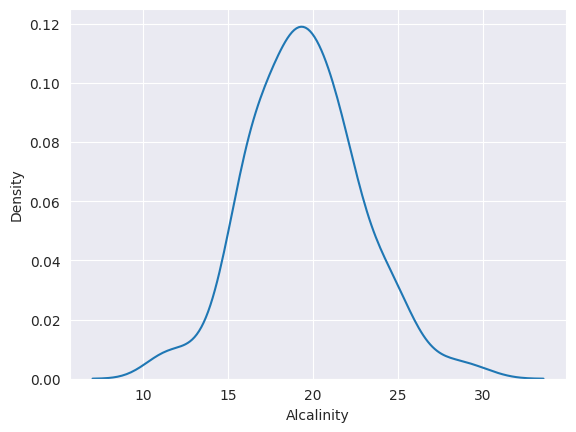

Magnesium


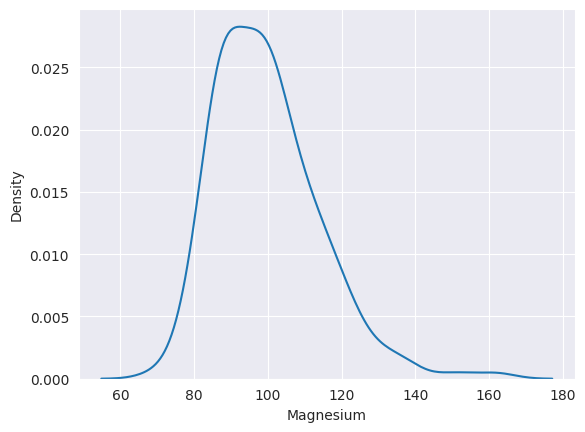

Phenols


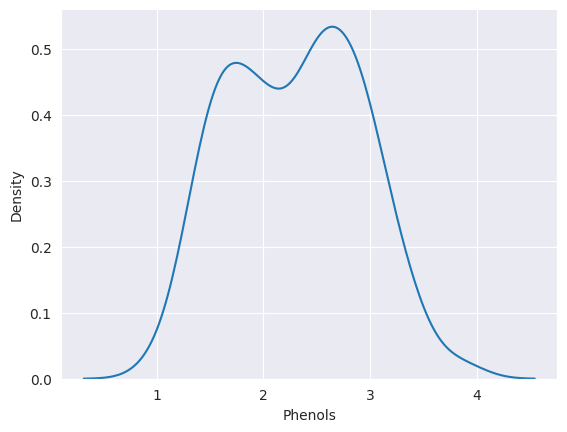

Flavanoids


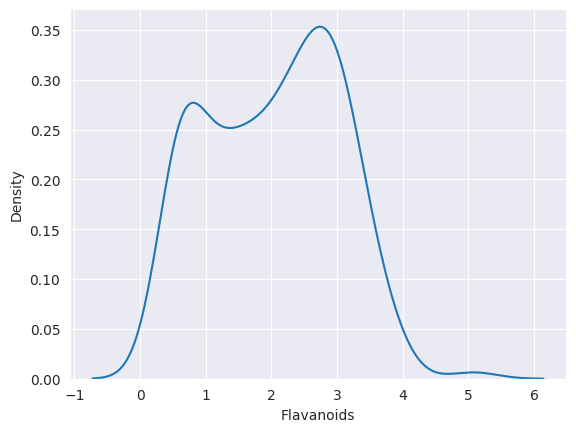

Nonflavanoids


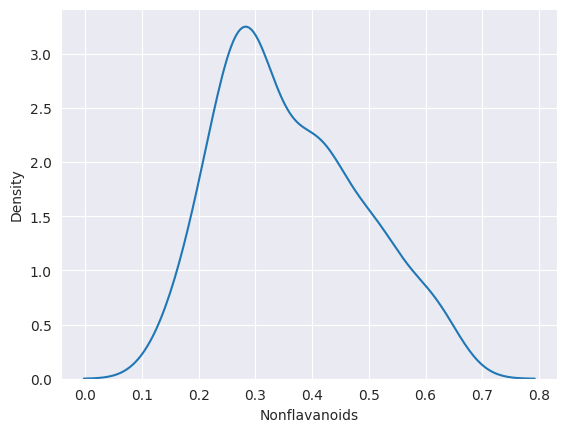

Proanthocyanins


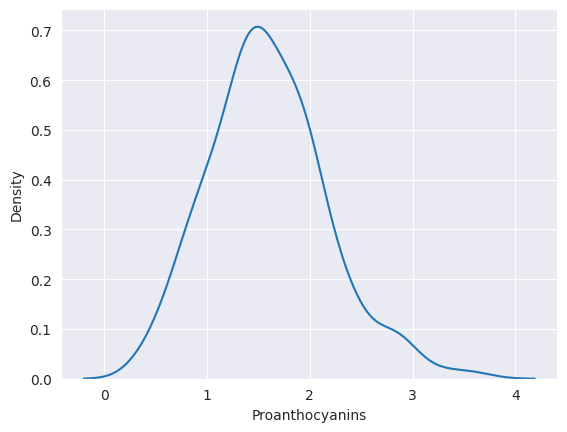

Color


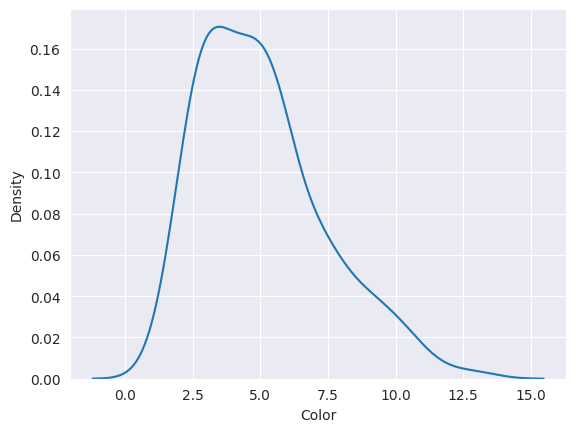

Hue


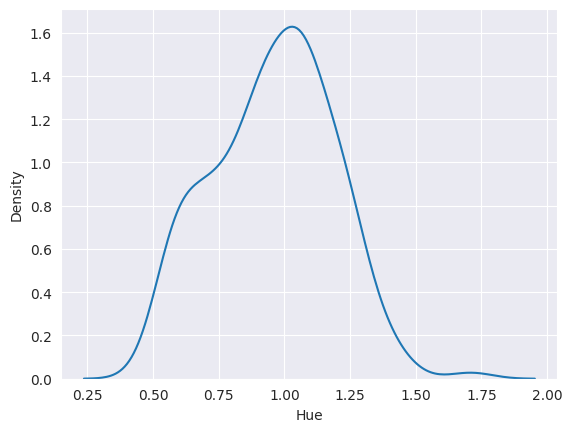

Dilution


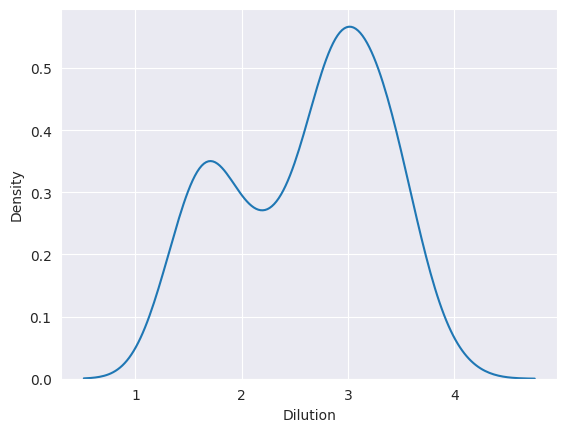

Proline


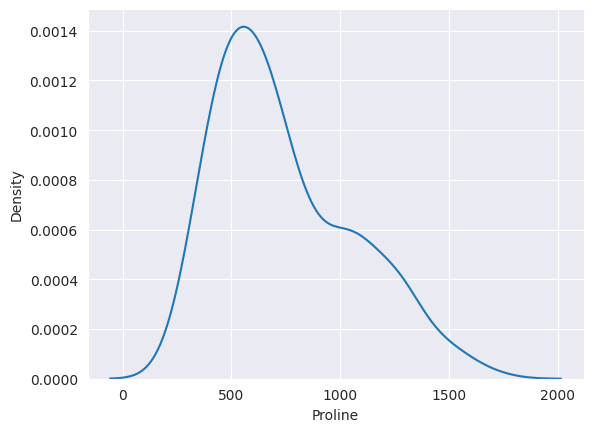

In [ ]:
# Kernel Density for every feature, singled out

for n in df.iloc[:, 1:]:
    print(n)
    sb.kdeplot(df[n])
    plt.show()

# Outlier Detection

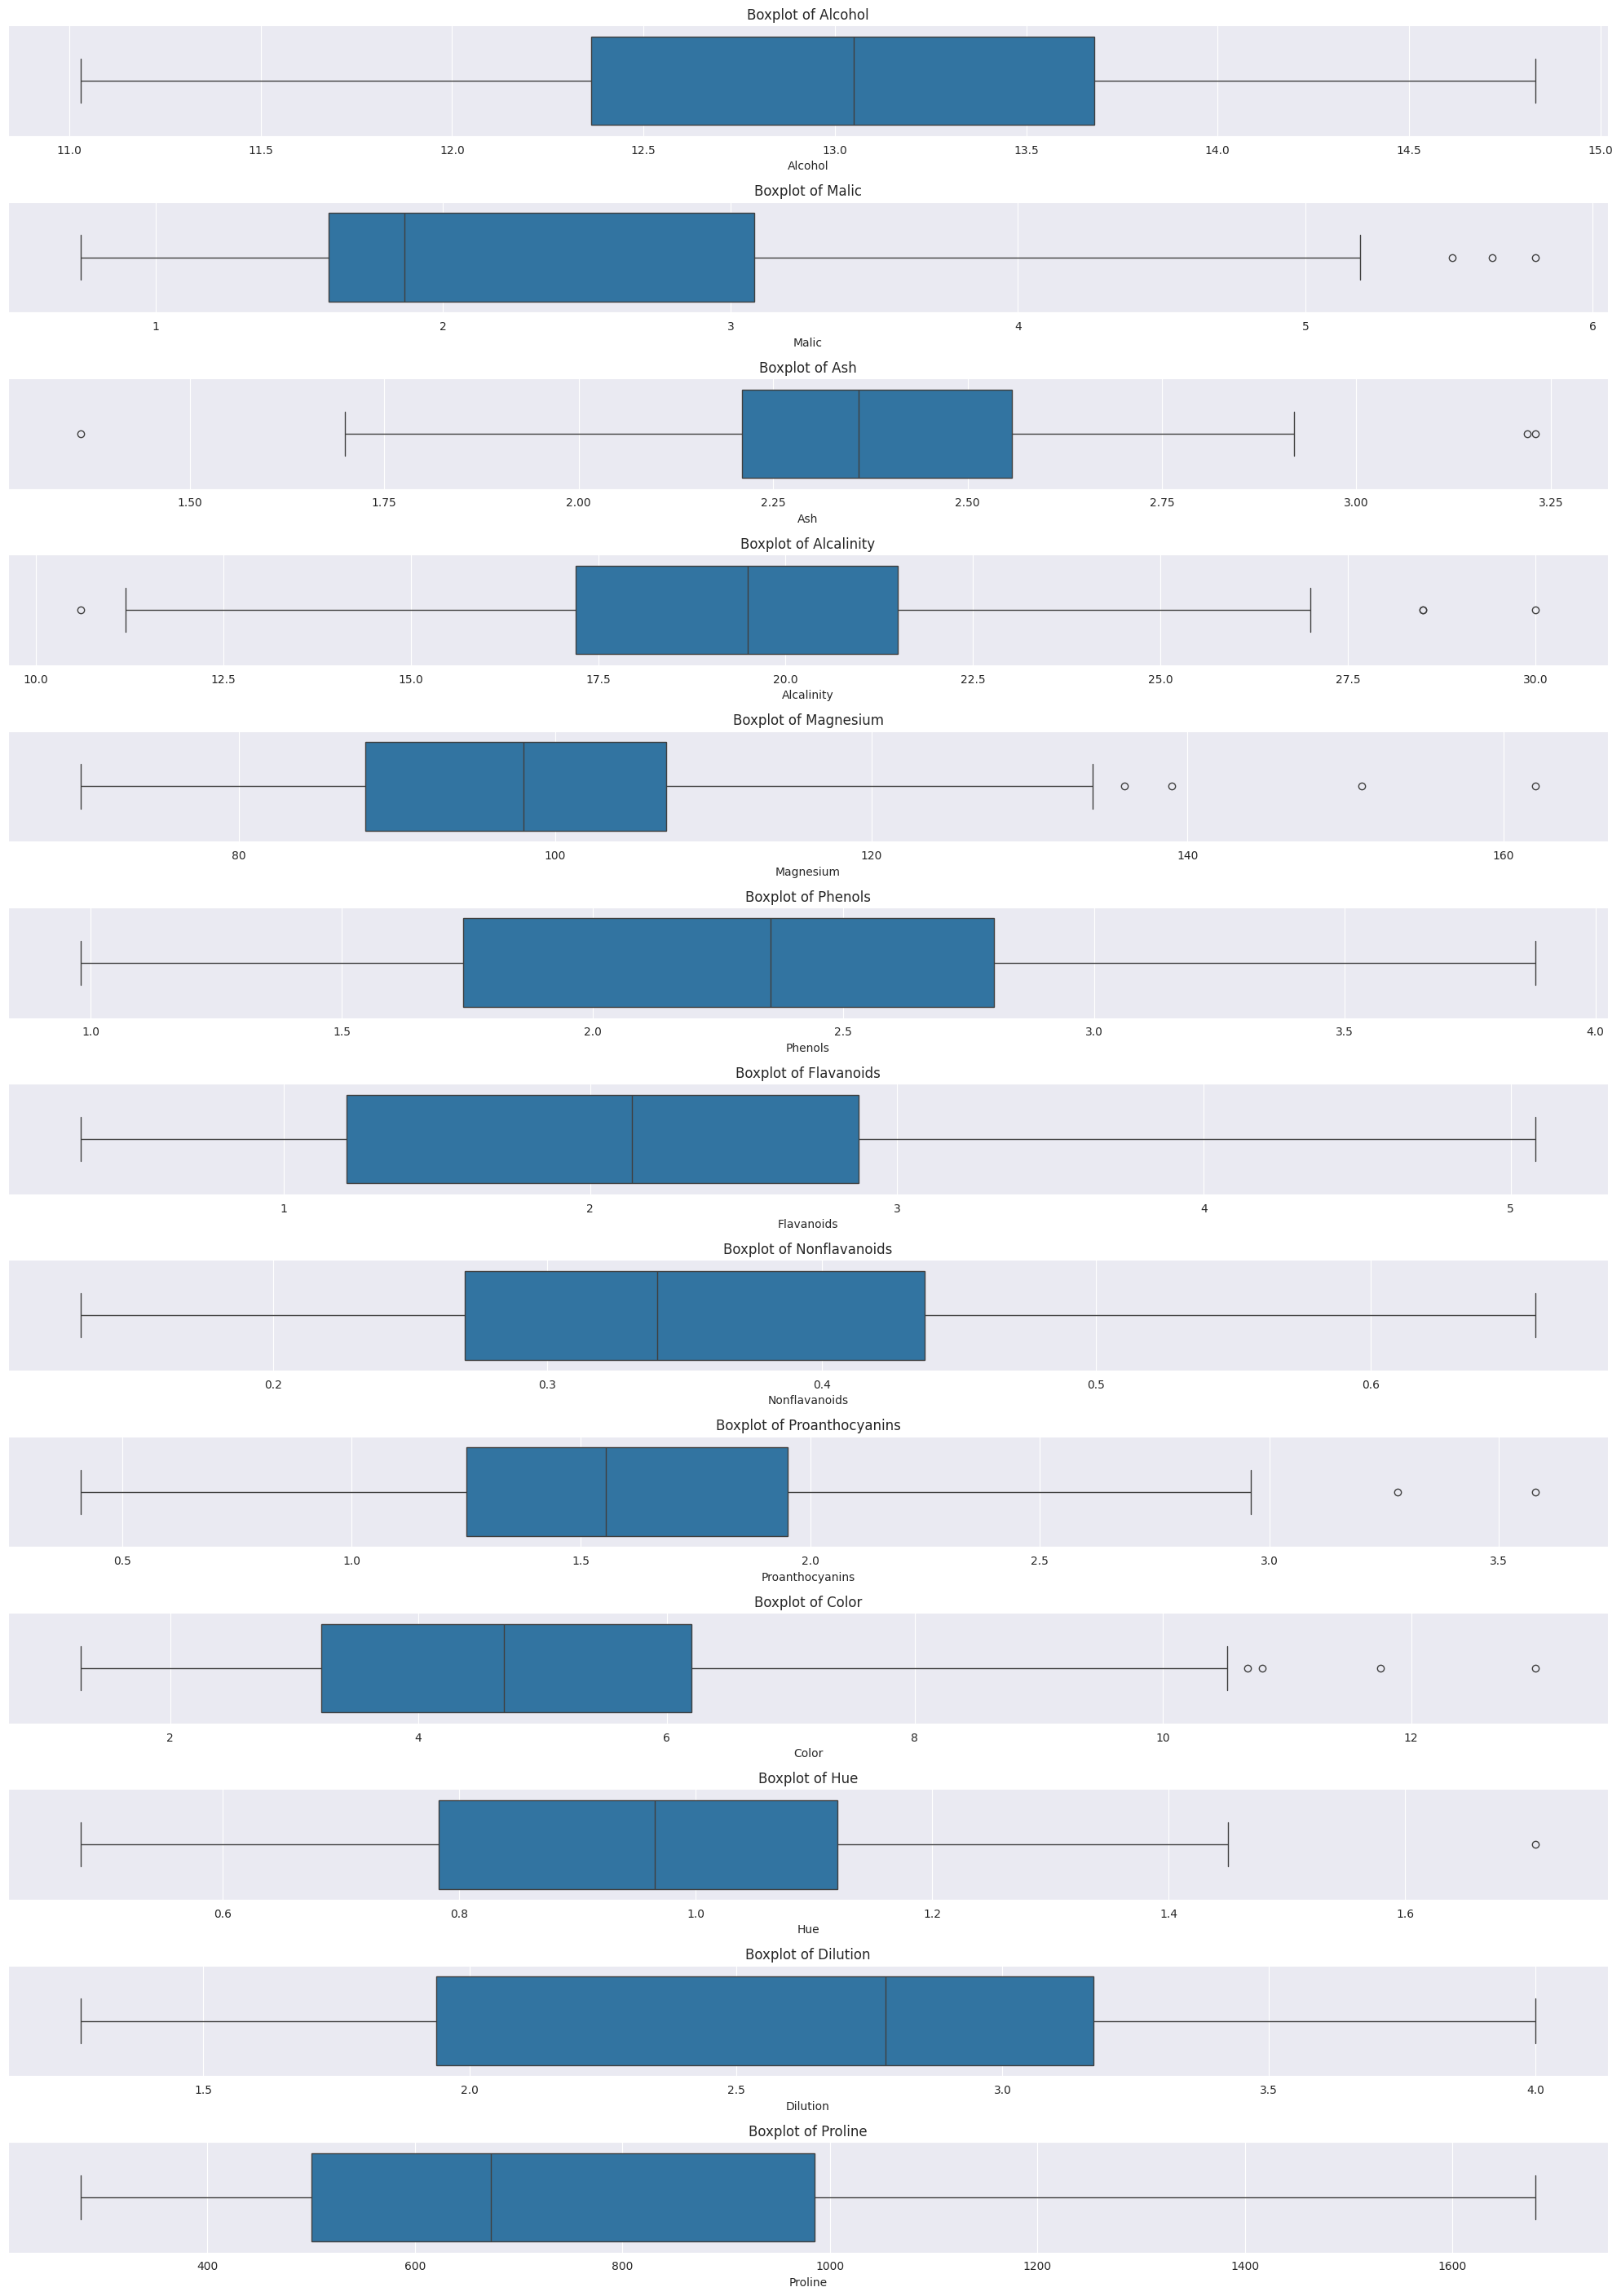

In [ ]:
columns = list(df.columns)
columns_to_plot = columns[1:]

plt.figure(figsize = (20, 30))

for i, column in enumerate(columns_to_plot, 1):
    plt.subplot(14, 1, i)
    sb.boxplot(data=df[column], orient='h')
    plt.title(f'Boxplot of {column}')

plt.tight_layout()
plt.show()

#Data Visualization

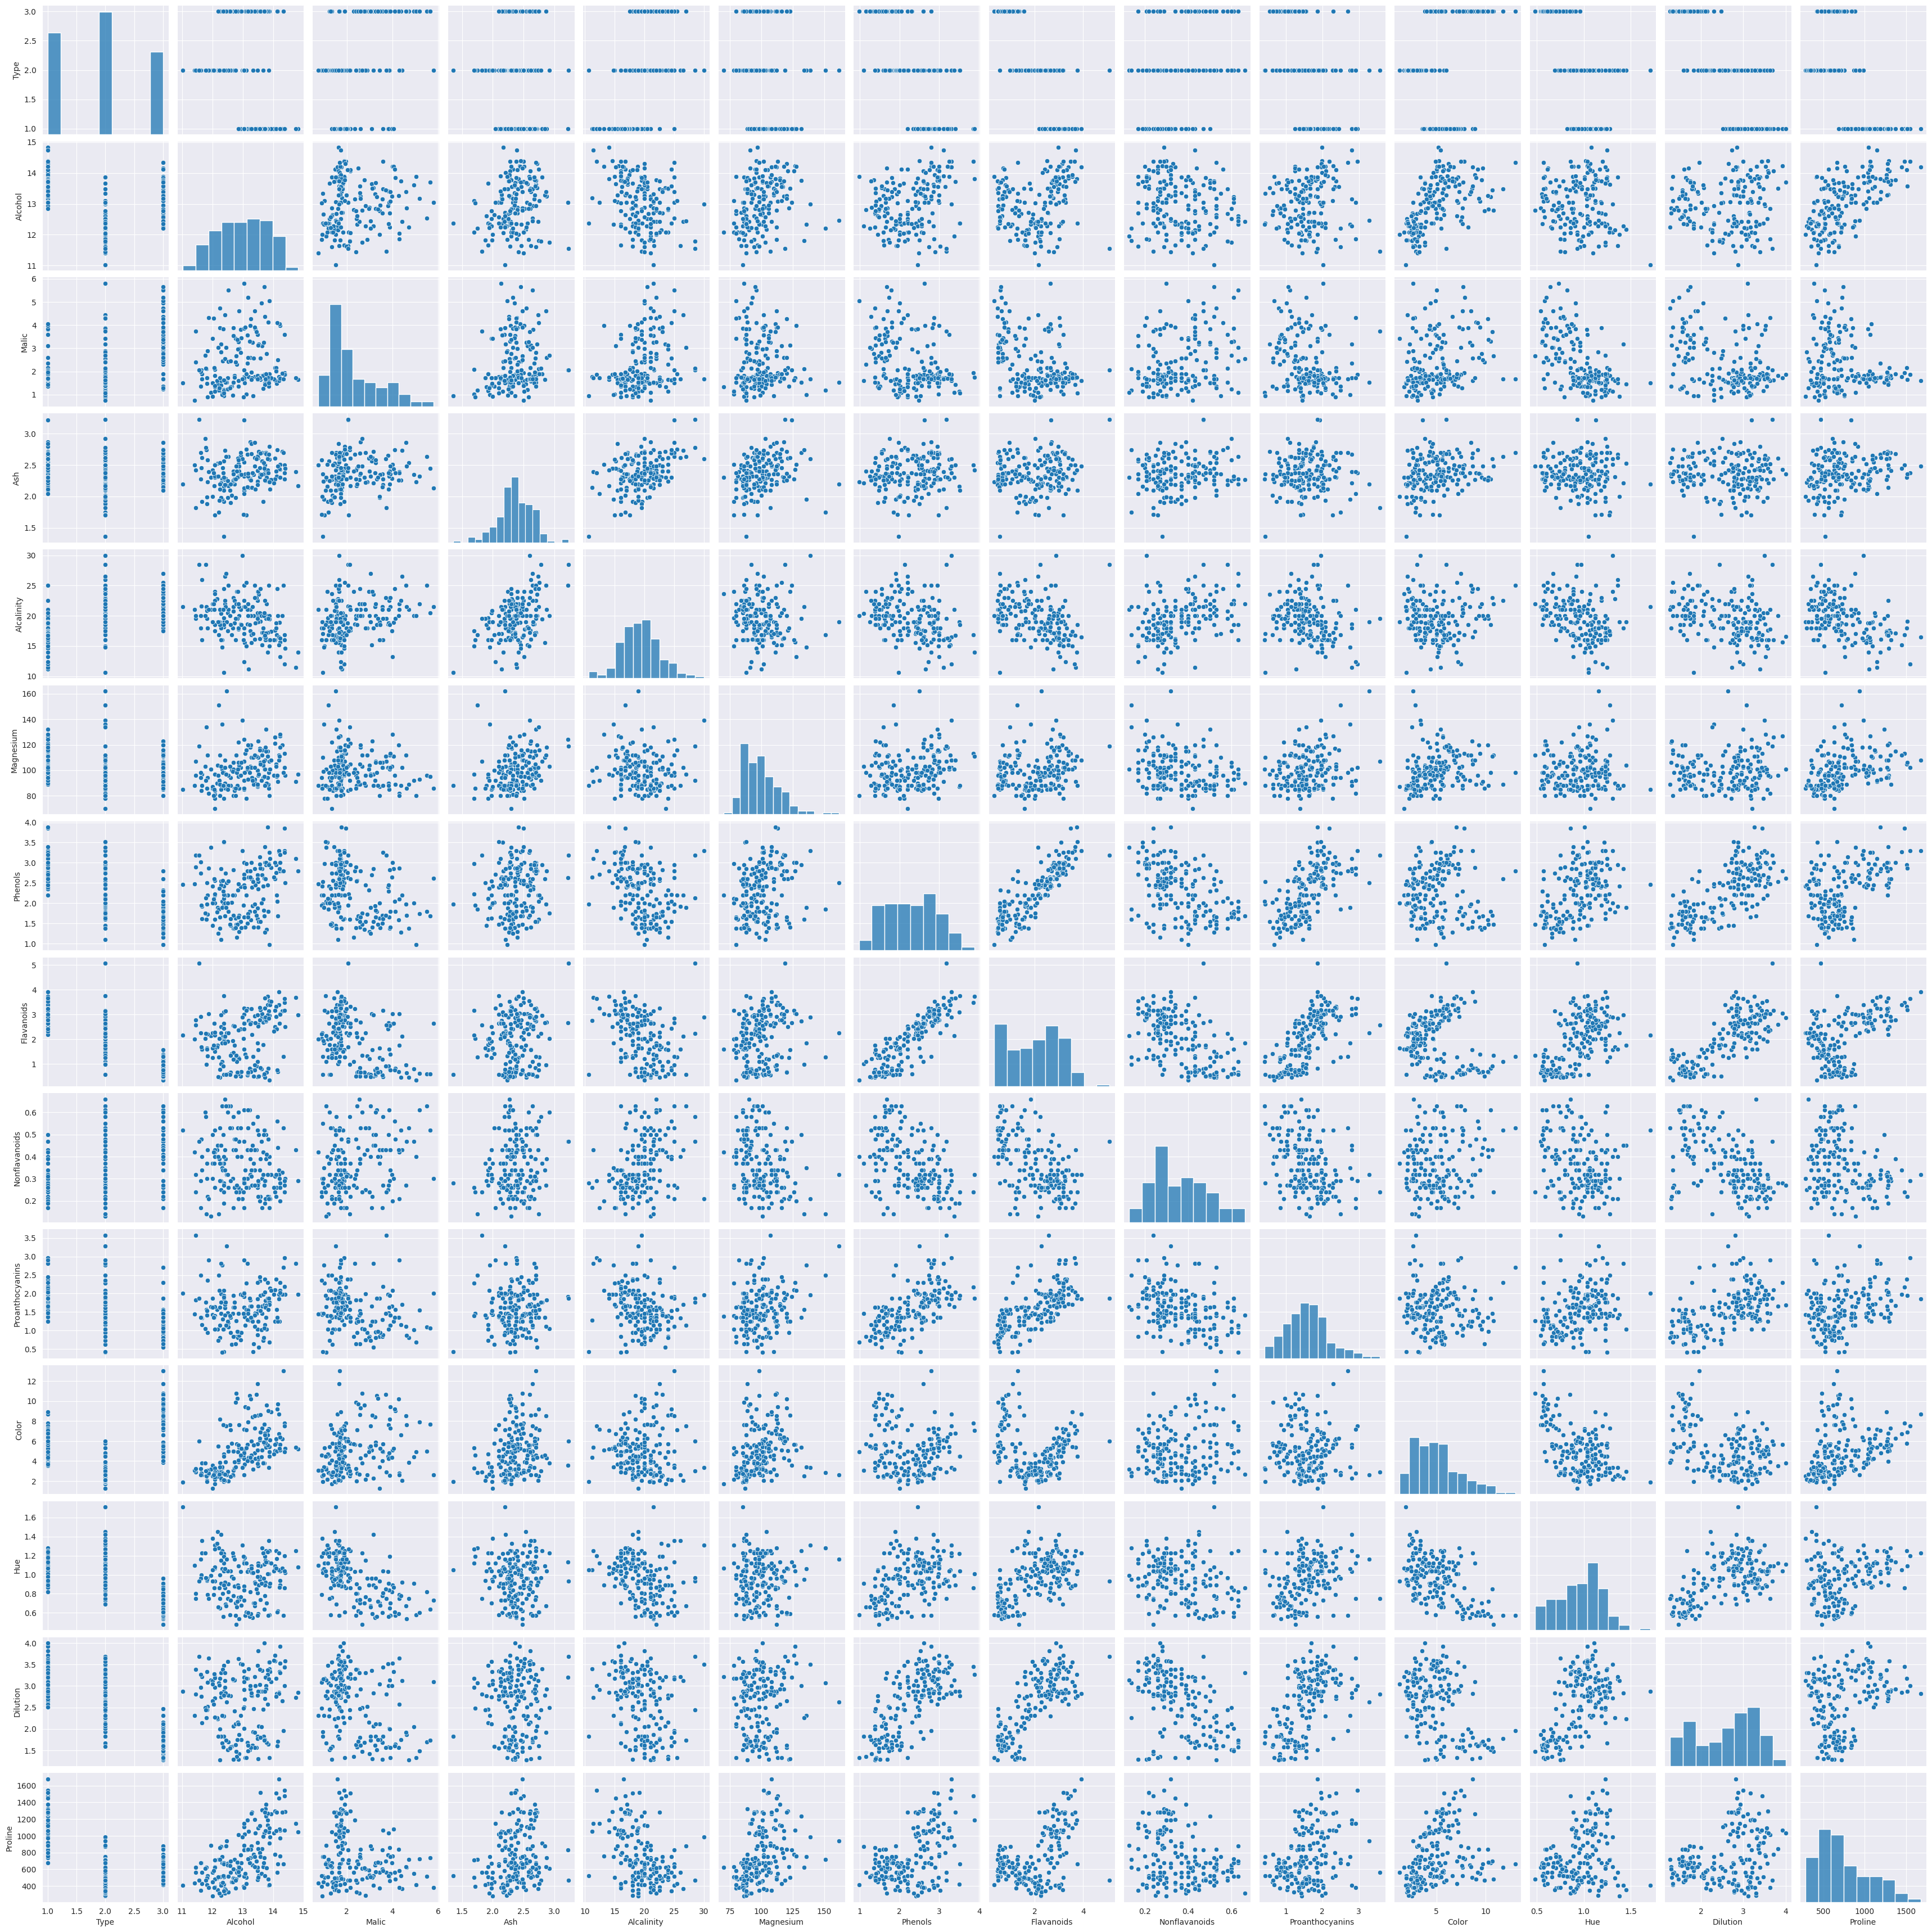

In [ ]:
sb.set_style(style='darkgrid')
sb.pairplot(df)

<Axes: >

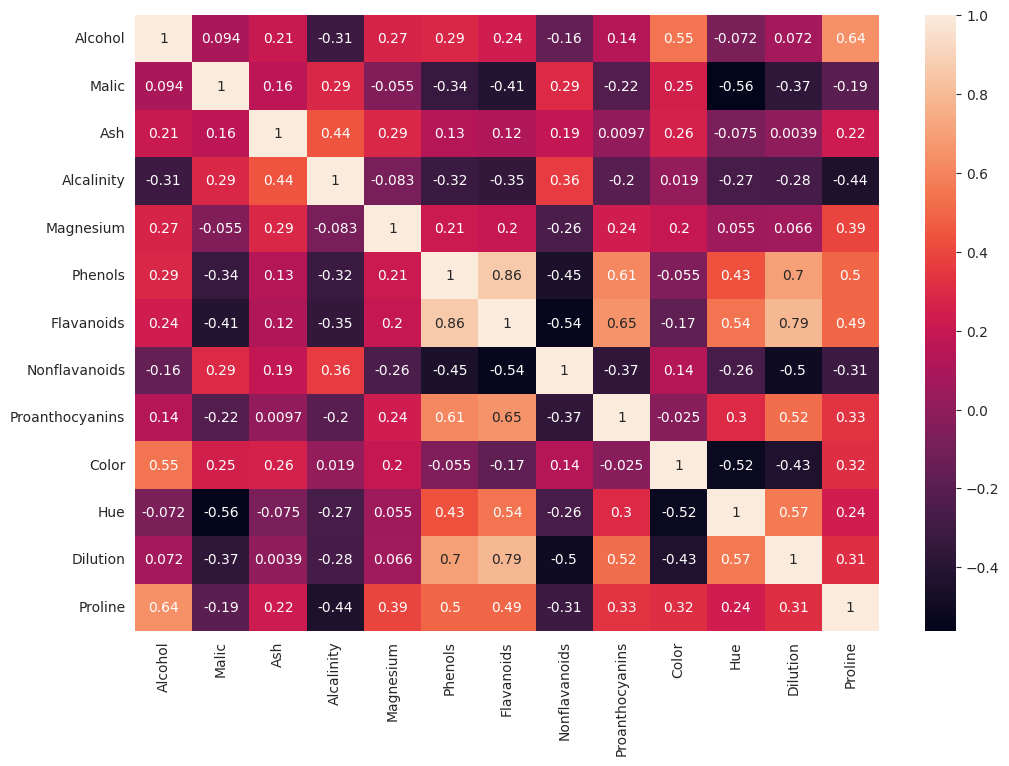

In [ ]:
plt.figure(figsize=(12,8))
sb.heatmap(
    df.iloc[:,1:].corr(),
    annot=True)

#    

In [ ]:
X = df.iloc[:, 1:]
X

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


# Standardizing the Data

In [ ]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
SS_X = SS.fit_transform(X)
SS_X = pd.DataFrame(SS_X)
SS_X

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,0.876275,2.974543,0.305159,0.301803,-0.332922,-0.985614,-1.424900,1.274310,-0.930179,1.142811,-1.392758,-1.231206,-0.021952
174,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,0.009893
175,0.332758,1.744744,-0.389355,0.151661,1.422412,-1.129824,-1.344582,0.549108,-0.422075,2.224236,-1.612125,-1.485445,0.280575
176,0.209232,0.227694,0.012732,0.151661,1.422412,-1.033684,-1.354622,1.354888,-0.229346,1.834923,-1.568252,-1.400699,0.296498


In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_values  = pca.fit_transform(SS_X)
pca_values

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01, ...,
        -4.51563395e-01,  5.40810414e-01, -6.62386309e-02],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00, ...,
        -1.42657306e-01,  3.88237741e-01,  3.63650247e-03],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01, ...,
        -2.86672847e-01,  5.83573183e-04,  2.17165104e-02],
       ...,
       [-2.67783946e+00, -2.76089913e+00, -9.40941877e-01, ...,
         5.12492025e-01,  6.98766451e-01,  7.20776948e-02],
       [-2.38701709e+00, -2.29734668e+00, -5.50696197e-01, ...,
         2.99821968e-01,  3.39820654e-01, -2.18657605e-02],
       [-3.20875816e+00, -2.76891957e+00,  1.01391366e+00, ...,
        -2.29964331e-01, -1.88787963e-01, -3.23964720e-01]])

In [ ]:
pd.DataFrame((pca.explained_variance_ratio_)*100)

,0
0,36.198848
1,19.207490
2,11.123631
3,7.069030
4,6.563294
5,4.935823
6,4.238679
7,2.680749
8,2.222153
9,1.930019


In [ ]:
# The amount of variance that each PCA explains is
var = pca.explained_variance_ratio_
var

array([0.36198848, 0.1920749 , 0.11123631, 0.0706903 , 0.06563294,
       0.04935823, 0.04238679, 0.02680749, 0.02222153, 0.01930019,
       0.01736836, 0.01298233, 0.00795215])

In [ ]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals = 4)*100)
var1

array([ 36.2 ,  55.41,  66.53,  73.6 ,  80.16,  85.1 ,  89.34,  92.02,
        94.24,  96.17,  97.91,  99.21, 100.01])

In [ ]:
pca.components_

array([[ 0.1443294 , -0.24518758, -0.00205106, -0.23932041,  0.14199204,
         0.39466085,  0.4229343 , -0.2985331 ,  0.31342949, -0.0886167 ,
         0.29671456,  0.37616741,  0.28675223],
       [-0.48365155, -0.22493093, -0.31606881,  0.0105905 , -0.299634  ,
        -0.06503951,  0.00335981, -0.02877949, -0.03930172, -0.52999567,
         0.27923515,  0.16449619, -0.36490283],
       [-0.20738262,  0.08901289,  0.6262239 ,  0.61208035,  0.13075693,
         0.14617896,  0.1506819 ,  0.17036816,  0.14945431, -0.13730621,
         0.08522192,  0.16600459, -0.12674592],
       [-0.0178563 ,  0.53689028, -0.21417556,  0.06085941, -0.35179658,
         0.19806835,  0.15229479, -0.20330102,  0.39905653,  0.06592568,
        -0.42777141,  0.18412074, -0.23207086],
       [-0.26566365,  0.03521363, -0.14302547,  0.06610294,  0.72704851,
        -0.14931841, -0.10902584, -0.50070298,  0.13685982, -0.07643678,
        -0.17361452, -0.10116099, -0.1578688 ],
       [-0.21353865, -0.536813

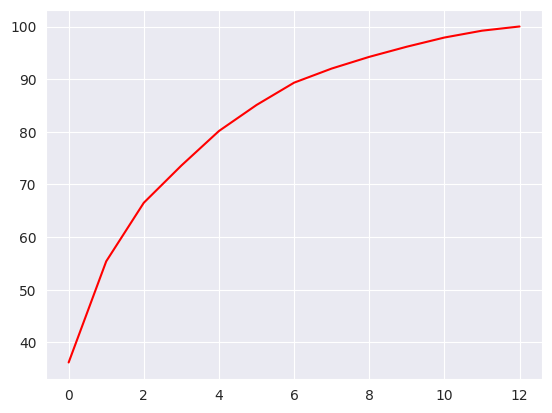

In [ ]:
# Variance plot for PCA components obtained
plt.plot(var1,color="red")

In [ ]:
pca_values[:, :3]

array([[ 3.31675081e+00, -1.44346263e+00, -1.65739045e-01],
       [ 2.20946492e+00,  3.33392887e-01, -2.02645737e+00],
       [ 2.51674015e+00, -1.03115130e+00,  9.82818670e-01],
       [ 3.75706561e+00, -2.75637191e+00, -1.76191842e-01],
       [ 1.00890849e+00, -8.69830821e-01,  2.02668822e+00],
       [ 3.05025392e+00, -2.12240111e+00, -6.29395827e-01],
       [ 2.44908967e+00, -1.17485013e+00, -9.77094891e-01],
       [ 2.05943687e+00, -1.60896307e+00,  1.46281883e-01],
       [ 2.51087430e+00, -9.18070957e-01, -1.77096903e+00],
       [ 2.75362819e+00, -7.89437674e-01, -9.84247490e-01],
       [ 3.47973668e+00, -1.30233324e+00, -4.22735217e-01],
       [ 1.75475290e+00, -6.11977229e-01, -1.19087832e+00],
       [ 2.11346234e+00, -6.75706339e-01, -8.65086426e-01],
       [ 3.45815682e+00, -1.13062988e+00, -1.20427635e+00],
       [ 4.31278391e+00, -2.09597558e+00, -1.26391275e+00],
       [ 2.30518820e+00, -1.66255173e+00,  2.17902616e-01],
       [ 2.17195527e+00, -2.32730534e+00

In [ ]:
pca_df = pd.concat([pd.DataFrame(pca_values[:,0:3],columns=['pc1','pc2','pc3']), df[['Type']]], axis = 1)
pca_df

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


<Axes: >

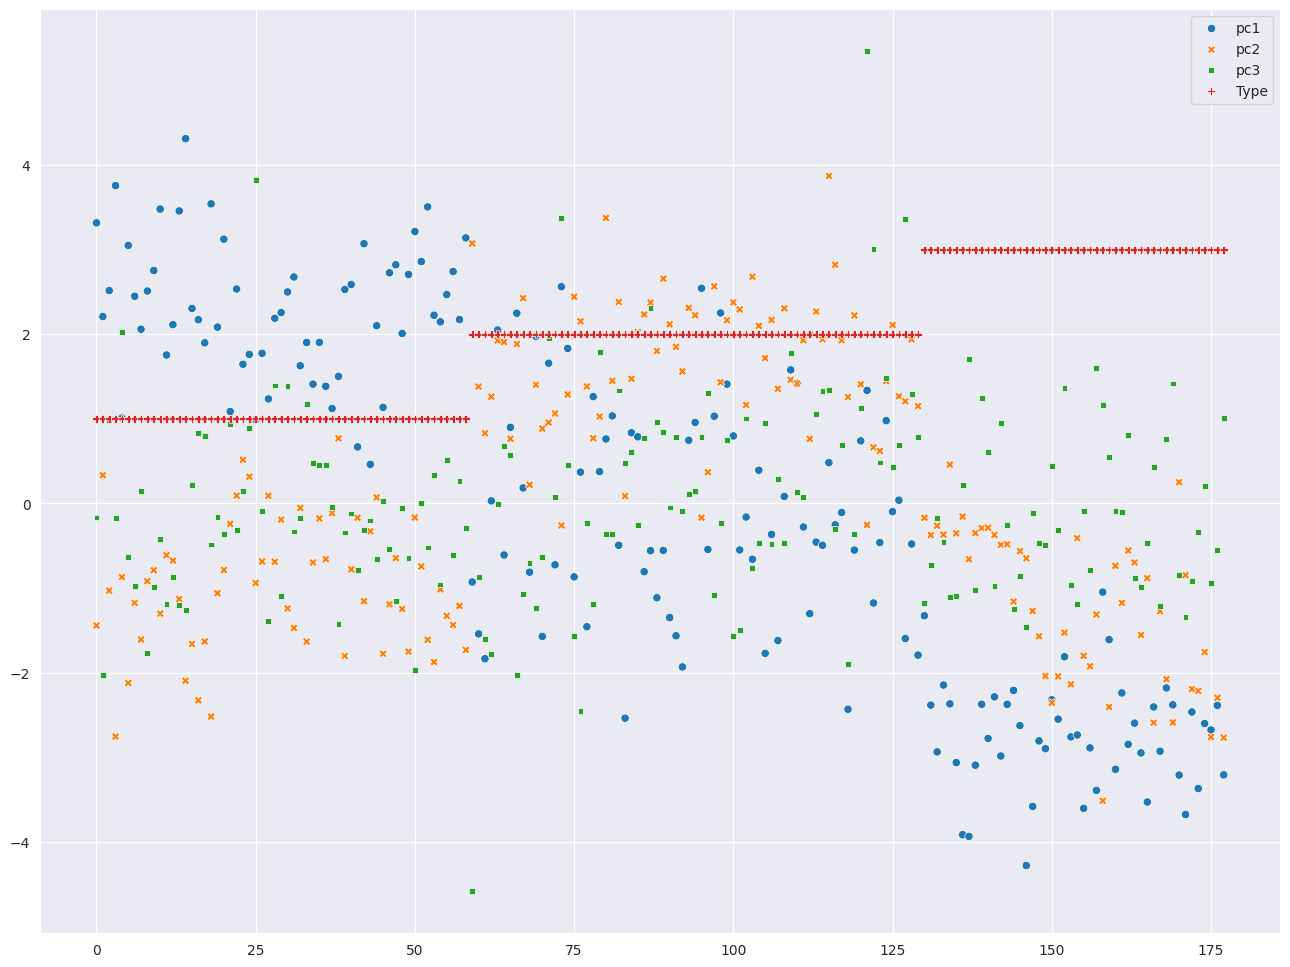

In [ ]:
# Visualization of PCAs
fig=plt.figure(figsize=(16,12))
sb.scatterplot(data=pca_df)


# **Clustering Using Principal Components**

# Hierarchical Clustering

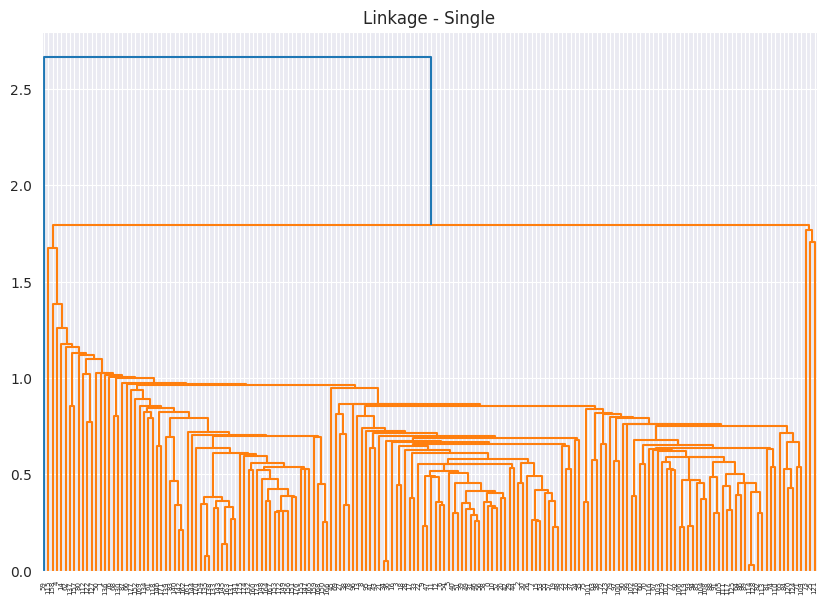

In [ ]:
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
pca_x = pca_df.iloc[:,:3]
plt.figure(figsize = (10,7))
plt.title("Linkage - Single")
dend_S = shc.dendrogram(shc.linkage(pca_x, method = "single"))

In [ ]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster_single = AgglomerativeClustering(n_clusters=2, affinity="euclidean", linkage = "single")
single = cluster_single.fit_predict(pca_x)
single = pd.DataFrame(single)
single.value_counts()


0    177
1      1
dtype: int64

In [ ]:
silhouette_single = silhouette_score(pca_df.iloc[:,:3], single)
print("The silhouette score for single linkage :", silhouette_single)

The silhouette score for single linkage : 0.36310673051041403


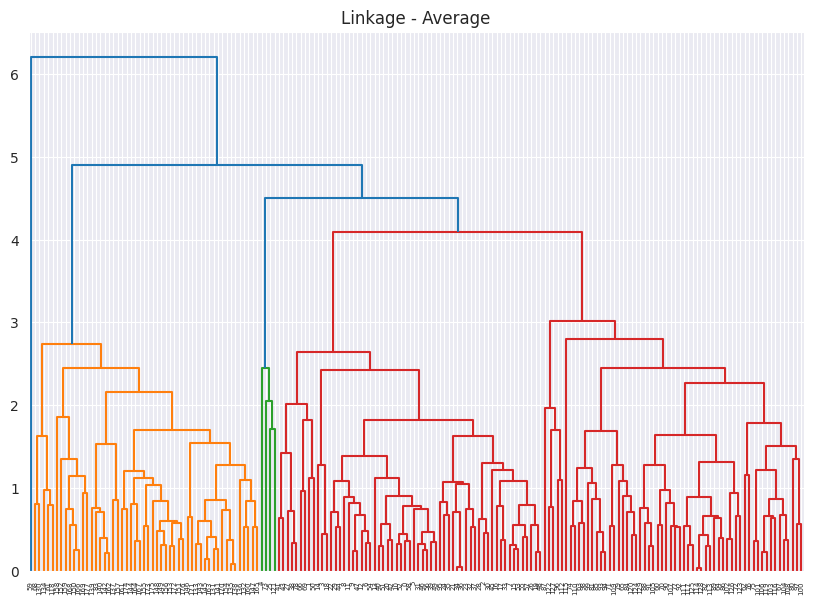

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Average")
dend_A = shc.dendrogram(shc.linkage(pca_x, method = "average"))

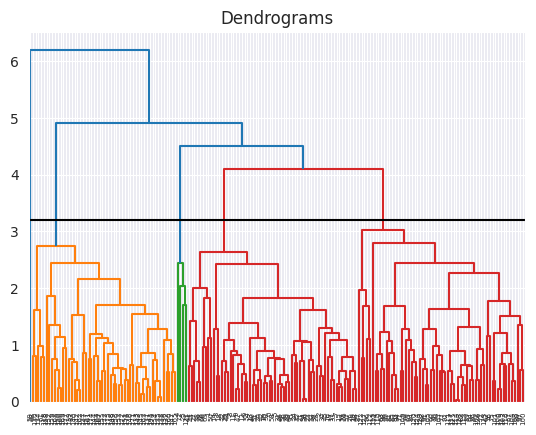

In [ ]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
from scipy.cluster import hierarchy
max_d = 3.2

Z = hierarchy.linkage(pca_x, method='average')
plt.figure()
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')


In [ ]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster_avg = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "average")
average = cluster_avg.fit_predict(pca_x)
average = pd.DataFrame(average)
average.value_counts()


0    121
2     52
1      4
3      1
dtype: int64

In [ ]:
silhouette_avg = silhouette_score(pca_x, average)
print("The silhouette score for average linkage :", silhouette_avg)

The silhouette score for average linkage : 0.32173131311197717


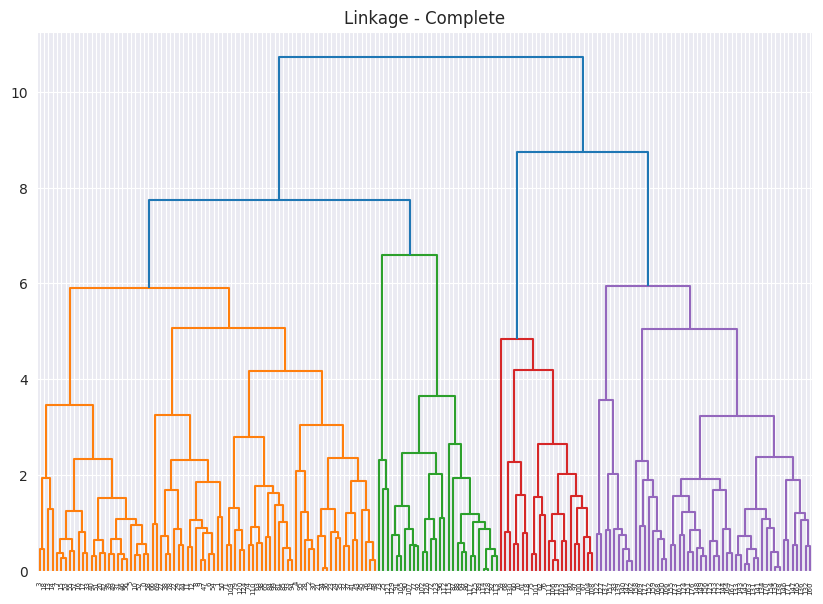

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10,7))
plt.title("Linkage - Complete")
dend_C = shc.dendrogram(shc.linkage(pca_x, method = "complete"))

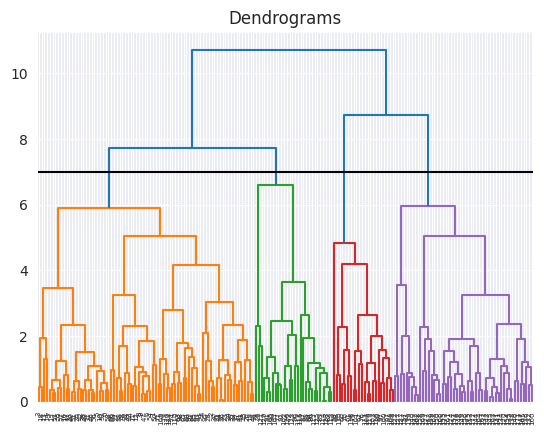

In [ ]:
# Creating Dendrogram for our data
# max_d = cut-off/ Threshold value
max_d = 7

Z = hierarchy.linkage(pca_x, method='complete')
plt.figure()
plt.title("Dendrograms")
dendrogram = hierarchy.dendrogram(Z)

# Cutting the dendrogram at max_d
plt.axhline(y=max_d, c='k')


In [ ]:
# Forming a group using clusters
from sklearn.cluster import AgglomerativeClustering
cluster_complete = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage = "complete")
complete = cluster_complete.fit_predict(pca_x)
complete = pd.DataFrame(complete)
complete.value_counts()

3    78
1    50
0    28
2    22
dtype: int64

In [ ]:
silhouette_complete = silhouette_score(pca_x, complete)
print("The silhouette score for complete linkage :", silhouette_complete)

The silhouette score for complete linkage : 0.35784842685673074


#    

# K-Means Clustering

## Elbow Method

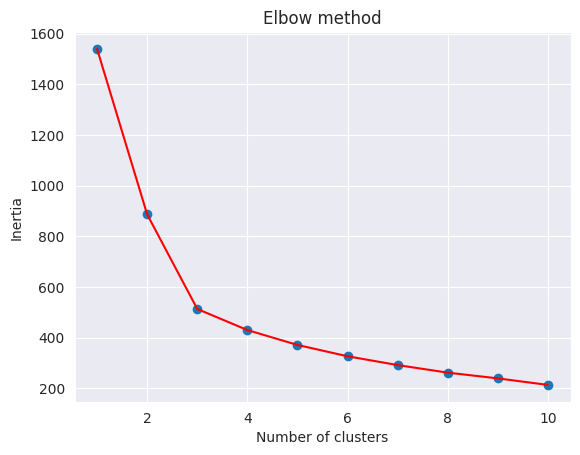

In [ ]:
from sklearn.cluster import KMeans
inertia = []

for i in range(1,11) :
    km = KMeans(n_clusters = i, random_state = 0 )
    km.fit(pca_df.iloc[:, :3])
    inertia.append(km.inertia_)

plt.scatter(range(1,11), inertia)
plt.plot(range(1,11), inertia, color = 'red')
plt.title("Elbow method")
plt.xlabel('Number of clusters')
plt.ylabel("Inertia")
plt.show()

In [ ]:
# K-means clustering using principal Components
from sklearn.cluster import  KMeans
KMeans = KMeans(n_clusters = 3, n_init = 30)
KMeans.fit(pca_x)
Y = KMeans.predict(pca_x)
Y = pd.DataFrame(Y)
Y

,0
0,0
1,0
2,0
3,0
4,0
...,...
173,1
174,1
175,1
176,1


In [ ]:
KMeans.inertia_

512.9995067661511

In [ ]:
pca_df1 = pca_df.copy()
pca_df1

,pc1,pc2,pc3,Type
0,3.316751,-1.443463,-0.165739,1
1,2.209465,0.333393,-2.026457,1
2,2.516740,-1.031151,0.982819,1
3,3.757066,-2.756372,-0.176192,1
4,1.008908,-0.869831,2.026688,1
...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3
174,-2.601956,-1.757229,0.207581,3
175,-2.677839,-2.760899,-0.940942,3
176,-2.387017,-2.297347,-0.550696,3


In [ ]:
pca_df1['clust'] = Y
pca_df1

,pc1,pc2,pc3,Type,clust
0,3.316751,-1.443463,-0.165739,1,0
1,2.209465,0.333393,-2.026457,1,0
2,2.516740,-1.031151,0.982819,1,0
3,3.757066,-2.756372,-0.176192,1,0
4,1.008908,-0.869831,2.026688,1,0
...,...,...,...,...,...
173,-3.370524,-2.216289,-0.342570,3,1
174,-2.601956,-1.757229,0.207581,3,1
175,-2.677839,-2.760899,-0.940942,3,1
176,-2.387017,-2.297347,-0.550696,3,1


In [ ]:
import sklearn
sklearn.metrics.silhouette_score(pca_df.iloc[:,:3], Y)

0.4532351215683952

In [ ]:
pca_df1.groupby(pca_df1.clust).mean()

,pc1,pc2,pc3,Type
clust,,,,
0,2.275808,-0.894518,-0.002150,1.063492
1,-2.720036,-1.125651,-0.239093,2.941176
2,-0.072720,1.777544,0.192644,2.000000


# **Conclusion**

### By utilizing Principal Component Analysis (PCA), we reduced the number of features from 13 to 3. Subsequently, through the application of Clustering Classification algorithms, we obtained an equivalent number of clusters compared to the original data.